In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import my_zodiac_library as mzl

Загружаем данные

In [2]:
name = 'data/total_cart_table(66)'
df = pd.read_csv(name, sep='\t', index_col='rank')
df = mzl.purification_df(mzl.preprocessing_df(df))
mzl.check_df(df)

OK


### Краткий обзор астрологического лора

По традиции считается, что:
1. **Львы** самые артистичные
2. **Овны** тоже очень артистичные и почти как Львы, так как в этом зодиаке экзальтирует Солнце;
3. **Стрельцы** очень артистичные, и социальные;
3. **Скорпионы** это как Львы, только "плохиши", обладающие каким-то там магнетизмом - то есть они тоже очень артистичные;
4. **Козероги** очень целеустремленные;
5. **Девы** наиболее мелочные и педантичные;
6. **Раки** самые обидчивые, крикливые, истеричные и эмоциональные;
7. **Тельцы**, **Близнецы**, **Водолеи**, **Весы**, **Рыбы** - среднячки в сфере киноискусства.

В группу стихии огня входят: **Львы**, **Овны** и **Скорпионы** - и это самая артистичная стихия.

### Несколько замечаний относящихся к статистике

1. Я буду проверять гипотезы, обнаруженые мной с помощью разведочного анализа данных в предыдущем блокоте.
2. Я буду использовать уровень значимости $\alpha = 0.05$.
3. Все гипотезы я буду проверять критерием Манна-Уитни.
4. Все предложения и возражения *крайне* приветсвуются; например, можно писать на anonymous469994@rambler.ru.

# 0. Пример проверки гипотезы

Проверим какую-нибудь заведомо ложную гипотезу чтобы "пристреляться". Чтобы убедиться, что наши инструменты работают как надо.

H0: совокупность последних цифр в числе года рождения звезды распределены равномерно.

Н1: распределение последних цифр в числе года рождения отличается от равномерного.

In [3]:
experimental_group = df.year.map(lambda x: x%10)
exp_size = len(experimental_group)
control_group = np.random.randint(0,10, size=exp_size)

Собрали данные. Теперь запускаем критерий.

In [4]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)
    pd.DataFrame(experimental_group).plot.hist(bins=10)

H0 not rejected.


Нулевая гипотеза не отвергается. Последние цифры в числе года рождения звезды действительно распределены равномерно. Очень неожиданно.

## I. Распределение зодиаков в сфере киноискусства

### Гипотеза 1. В киноискусстве не равномерное распределение зодиаков.

H0: зодиаки в киноискусстве распределены равномерно.

Н1: распределение зодиаков в киноискусстве отличается от равномерного.

In [5]:
experimental_group = np.array(pd.Series(map(mzl.zod_code.get, df.zodiac)).astype(int))
control_group = np.random.randint(1,13, size=len(experimental_group))

Собрали данные в двух группах: control_group - контрольная группа с сгенерированным равномерном распределением натуральных чисел из промежутка $[1,12]$; experimental_group - проверяемые данные, зодиаки звезд, закодированные числами.

Для убедительности посмотрим на распределение этих совокупностей.

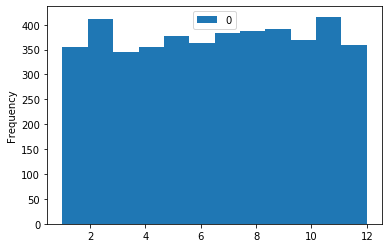

In [6]:
# контрольная группа
pd.DataFrame(control_group).plot.hist(bins=12)

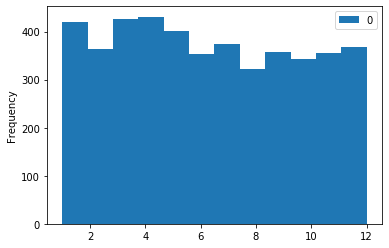

In [7]:
# эксперементальные данные
pd.DataFrame(experimental_group).plot.hist(bins=12)

Запускаем тест...

In [8]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.000


Мы поличили такое значение p-value, что можем отвергнуть нулевую гипотезу и принять альернативную гипотезу. Это значит, что распределение зодиаков в киноискусстве отличается от равномерного.

### Гипотеза 2. В киноискусстве не равномерное распределение элементов.

H0: элементы в киноискусстве распределены равномерно.

Н1: распределение элементов в киноискусстве отличается от равномерного.

In [9]:
elem_color = dict({
    'fire': 0,
    'air': 1,
    'water': 2,
    'earth': 3,
})

experimental_group = df.element.map(lambda x: elem_color[x])
control_group = np.random.randint(len(np.unique(experimental_group)), size=len(experimental_group))

In [10]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.022


Можно и принять нулевую гипотезу.

# II. Популярность 

### Гипотеза 3. Скорпионы чаще всех других зодиаков получают сердечки под профилем в кинопоиске.

H0: распределение сердечек под Скорпионами не отличается от совокупного распределения всех остальных зодиаков.

Н1: распределение сердечек под Скорпионами отличается от распределения сердечек совокупности всех остальных зодиаков.

In [11]:
experimental_group = df[df.zodiac == 'Scorpio'].favors
control_group = df[df.zodiac != 'Scorpio'].favors

In [12]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 not rejected.


Нет. Скорпионы не любимее всех остальных зодиаков.

### Гипотеза 4. Зодиаки стихии огня чаще получают сердечки под профилем.

H0: распределение сердечек под зодиаками стихии огня не отличается от совокупного распределения всех остальных зодиаков.

Н1: распределение сердечек под зодиаками стихии огня отличается от распределения сердечек совокупности всех остальных зодиаков.

In [13]:
experimental_group = df[df.element == 'fire'].favors
control_group = df[df.element != 'fire'].favors

In [14]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.012


Действительно, огненые зодиаки самые любимые зрителями. Несмотря на то, что и водные Скорпионы ими тоже очень любимы. Понятно, что четверка самых сердечных актеров зрителей это: Львы, Скорпионы, Овны и Стрельцы.

# III. Киношные профессии

### Гипотеза 5.  Некоторые зодиаки более других склонны скорее к работе режисера, сценариста или продюсера, чем к работе актера.

H0: Распределение не-актеров не отличается от равномерного распределения.

H1: Распределение не-актеров отличается от равномерного распределения.

In [15]:
experimental_group = df[(df['writer'] != 0) | (df['producer'] != 0) | (df['director'] != 0)].zodiac.map(lambda x: int(mzl.zod_code[x]))
control_group = np.random.randint(1,13, size=len(experimental_group))

In [16]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.000


Можно отвергнуть нулевую гипотезу.

### Гипотеза 6.  Девы более других склонны скорее к работе режисера, сценариста или продюсера, чем к работе актера.

H0: Распределение дев не-актеров не отличается от распределения не-дев не-актеров.

H1: Распределение дев не-актеров отличается от распределения не-дев не-актеров.

In [17]:
exp_df = df[(df['writer'] != 0) | (df['producer'] != 0) | (df['director'] != 0)][df.zodiac == 'Virgo']
cnt_df = df[(df['writer'] != 0) | (df['producer'] != 0) | (df['director'] != 0)][df.zodiac != 'Vigro']

In [18]:
experimental_group = exp_df.writer + exp_df.producer + exp_df.director
control_group = cnt_df.writer + cnt_df.producer + cnt_df.director

In [19]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.028


Действительно, девы более других склонны к работе режисера, сценариста или продюсера

# IV. Число фильмов за карьеру

### Гипотеза 7. Огненные знаки чаще других снимаются в кино.

H0: Распределение кол-ва фильмов за карьеру у зодиаков стихии огня не отличается от распределения остальных зодиаков.

H1: Распределение кол-ва фильмов за карьеру у зодиаков стихии огня отличается от распределения остальных знаков.

In [4]:
experimental_group = df[df.element=='fire']['total_films']
control_group = df[df.element!='fire']['total_films']

In [5]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.001


Следовательно, распределение кол-ва фильмов за карьеру у зодиаков стихии огня отличается от распределения остальных знаков.

# V.  Награды

### Гипотеза 8. Огненные зодиаки получают награды чаще зодиаков других стихий. 

H0: Распределение получения наград у зодиаков стихии огня не отличается от распределение получения наград у зодиаков других стихий стихии.

H1: Распределение получения наград у зодиаков стихии огня отличается от распределение получения наград у зодиаков других стихий стихии.

In [37]:
experimental_group = df[df.element=='fire'].awards.astype(bool).astype(int)
control_group = df[df.element!='fire'].awards.astype(bool).astype(int)

In [38]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.020


Следовательно, распределение получения наград у зодиаков стихии огня отличается от распределение получения наград у зодиаков других стихий стихии.

### Гипотеза 9. Огненные зодиаки получают Оскар чаще зодиаков других стихий. 

H0: Распределение получения Оскаров у зодиаков стихии огня не отличается от распределение получения Оскаров у зодиаков других стихий стихии.

H1: Распределение получения Оскаров у зодиаков стихии огня отличается от распределение получения Оскаров у зодиаков других стихий стихии.

In [39]:
experimental_group = df[df.element=='fire'].oscar.astype(bool).astype(int)
control_group = df[df.element!='fire'].oscar.astype(bool).astype(int)

In [40]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 not rejected.


Следователно, распределение получения Оскаров у зодиаков стихии огня не отличается от распределение получения Оскаров у зодиаков других стихий стихии.

### Гипотеза 10. Огненные зодиаки получают Оскар (или хотя бы номинацию на Оскар) чаще зодиаков других стихий.

H0: Распределение получения Оскаров (и номинаций на Оскар) у зодиаков стихии огня не отличается от распределение получения Оскаров (и номинаций на Оскар) у зодиаков других стихий стихии.

H1: Распределение получения Оскаров (и номинаций на Оскар) у зодиаков стихии огня отличается от распределение получения Оскаров (и номинаций на Оскар) у зодиаков других стихий стихии.

In [30]:
df['have_oscar_or_nom_oscar'] = (df['nom_oscar'] + df['oscar']).astype(bool).astype(int)

experimental_group = df[df.element=='fire'].have_oscar_or_nom_oscar
control_group = df[df.element!='fire'].have_oscar_or_nom_oscar

In [31]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 not rejected.


Распределение получения Оскаров (и номинаций на Оскар) у зодиаков стихии огня не отличается от распределение получения Оскаров (и номинаций на Оскар) у зодиаков других стихий стихии.

# VI. Добавление в закладки

### Гипотеза 11. Огненные зодиаки добавляют в закладки чаще зодиаков других стихий. 

H0: Распределение добавления в закладки у зодиаков стихии огня не отличается от распределения добавления в закладки у зодиаков других стихий.

H1: Распределение добавления в закладки у зодиаков стихии огня отличается от распределения добавления в закладки у зодиаков других стихий.

In [43]:
experimental_group = df[df.element=='fire'].folders
control_group = df[df.element!='fire'].folders

In [44]:
st, p = stats.mannwhitneyu(experimental_group, control_group)

alpha = 0.05
if p > alpha:
    print('H0 not rejected.')
else:
    print('H0 rejected;', 'p-value=%.3f'%p)

H0 rejected; p-value=0.005


# VII. Выводы

Были рассмотрены гипотезы:
1. В киноискусстве не равномерное распределение зодиаков.
2. В киноискусстве не равномерное распределение элементов.
3. Скорпионы чаще всех других зодиаков получают сердечки под профилем в кинопоиске.
4. Зодиаки стихии огня чаще получают сердечки под профилем.
5. Некоторые зодиаки более других склонны скорее к работе режисера, сценариста или продюсера, чем к работе актера.
6. Девы более других склонны скорее к работе режисера, сценариста или продюсера, чем к работе актера.
7. Огненные знаки чаще других снимаются в кино.
8. Огненные зодиаки получают награды чаще зодиаков других стихий.
9. Огненные зодиаки получают Оскар чаще зодиаков других стихий.
10. Огненные зодиаки получают Оскар (или хотя бы номинацию на Оскар) чаще зодиаков других стихий.
11. Огненные зодиаки добавляют в закладки чаще зодиаков других стихий.

Гипотезы: 1, 2, 4, 5, 6, 7, 8, 11 - подтвердились.

Гипотезы: 3, 9, 10 - не подтвердились.

Я накидал наобум несколько первых пришедших на ум гипотез. Предлагайте другие гипотезы - я их обязательно проверю, если их можно будет проверить по этим данным